In [154]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as dates
import mpl_finance as candle
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from pylab import rcParams


%matplotlib inline

# Pega blue chips de 2017

In [6]:
blue_chips = pd.read_csv('BLUECHIPS2017')

# Cria planilha contendo fechamento das 100 empresas

In [155]:
df_relacoes = pd.DataFrame()
for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
    df_relacoes[blue_chip] = pd.read_csv('HISTORICO_2017/' + blue_chip + '_2017')['PRECO FECHAMENTO']

df_relacoes

,PETR4,ITUB4,VALE3,BBDC4,ABEV3,BBAS3,BVMF3,CIEL3,ITSA4,KROT3,...,OIBR3,PDGR3,ABCB4,BRPR3,TUPY3,SLCE3,GUAR3,CGAS5,AALR3,DIRR3
0,14.66,33.53,25.06,28.80,16.31,27.54,16.28,27.25,8.21,13.30,...,2.64,1.52,13.31,7.47,12.44,14.66,57.52,46.70,14.60,4.61
1,15.50,34.95,26.17,30.00,16.64,28.80,16.95,28.01,8.57,13.96,...,2.65,1.37,13.88,7.67,12.57,14.76,60.20,46.95,14.90,4.93
2,15.50,35.10,25.70,29.81,16.51,28.65,17.27,27.61,8.62,13.88,...,2.62,1.43,14.28,8.00,12.40,15.25,60.00,47.30,14.90,4.93
3,15.75,35.58,26.68,30.14,16.60,28.58,17.06,27.31,8.70,13.70,...,2.67,1.50,14.51,8.05,12.61,15.67,61.32,46.91,15.35,4.83
4,15.66,35.70,25.97,30.33,16.46,28.89,17.05,27.37,8.67,13.60,...,2.68,1.49,14.65,7.97,12.86,15.66,59.50,45.82,15.45,4.85
5,15.33,35.87,26.50,30.37,16.53,27.80,17.05,27.50,8.76,13.51,...,2.77,1.54,14.60,7.91,12.60,15.65,59.49,45.98,15.21,4.95
6,15.48,35.75,28.54,30.37,16.34,28.18,17.37,26.58,8.70,13.39,...,2.89,1.77,14.60,7.79,12.68,15.55,62.00,46.78,14.89,4.84
7,15.66,35.82,29.13,30.60,16.41,28.48,17.45,26.18,8.76,13.18,...,2.76,1.81,14.70,7.80,12.61,15.57,61.31,46.03,14.90,4.81
8,15.90,36.73,30.07,31.32,16.93,29.20,17.91,25.77,9.00,13.73,...,2.89,1.95,15.65,8.04,13.16,15.98,67.40,47.50,15.00,4.94
9,15.68,35.98,30.99,31.07,17.11,28.44,17.88,25.98,8.91,14.03,...,3.01,2.06,15.86,7.99,13.01,15.85,65.75,46.13,15.00,5.26


# Gera as correlações

In [156]:
corr_pearson = df_relacoes.corr(method='pearson')
corr_kendall = df_relacoes.corr(method='kendall')
corr_spearman = df_relacoes.corr(method='spearman')

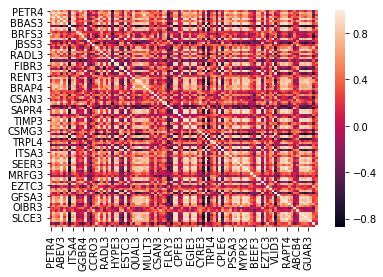

In [157]:
sns.heatmap(corr_pearson)

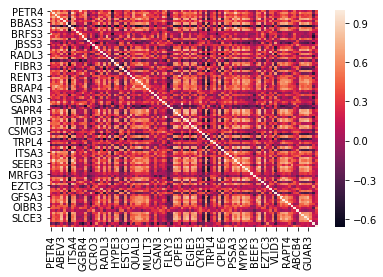

In [158]:
sns.heatmap(corr_kendall)

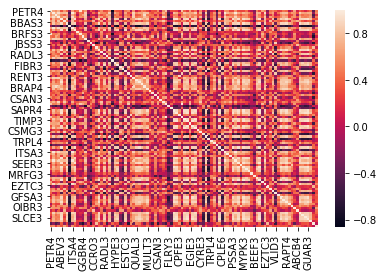

In [159]:
sns.heatmap(corr_spearman)

In [160]:
corr_spearman

,PETR4,ITUB4,VALE3,BBDC4,ABEV3,BBAS3,BVMF3,CIEL3,ITSA4,KROT3,...,OIBR3,PDGR3,ABCB4,BRPR3,TUPY3,SLCE3,GUAR3,CGAS5,AALR3,DIRR3
PETR4,1.000000,0.662357,0.568528,0.721106,0.327830,0.595797,0.389362,-0.172257,0.637321,0.356525,...,0.197177,0.659541,0.106668,0.372519,0.267893,0.139717,0.290487,0.414210,-0.416114,0.477583
ITUB4,0.662357,1.000000,0.736711,0.928686,0.737741,0.775465,0.830890,-0.491107,0.983849,0.709967,...,0.621082,0.595131,0.317067,0.865349,0.677220,0.644608,0.712188,0.715679,-0.175805,0.560894
VALE3,0.568528,0.736711,1.000000,0.749862,0.493883,0.365514,0.583078,-0.244985,0.706948,0.477626,...,0.303666,0.570814,-0.056464,0.599808,0.425864,0.509258,0.477693,0.577709,-0.485192,0.226942
BBDC4,0.721106,0.928686,0.749862,1.000000,0.591086,0.802046,0.696364,-0.389164,0.912724,0.597139,...,0.548964,0.599956,0.347901,0.747250,0.529066,0.491804,0.541582,0.650536,-0.310696,0.490904
ABEV3,0.327830,0.737741,0.493883,0.591086,1.000000,0.390684,0.910761,-0.804055,0.769386,0.922550,...,0.509615,0.199289,0.005191,0.878397,0.891027,0.922771,0.950145,0.805147,0.345117,0.328663
BBAS3,0.595797,0.775465,0.365514,0.802046,0.390684,1.000000,0.501698,-0.190749,0.792672,0.359014,...,0.610850,0.562064,0.714222,0.569569,0.340627,0.221263,0.341943,0.376364,-0.196738,0.652457
BVMF3,0.389362,0.830890,0.583078,0.696364,0.910761,0.501698,1.000000,-0.665477,0.830341,0.886827,...,0.594390,0.283635,0.079539,0.931450,0.804821,0.868969,0.916990,0.727637,0.216533,0.420131
CIEL3,-0.172257,-0.491107,-0.244985,-0.389164,-0.804055,-0.190749,-0.665477,1.000000,-0.524704,-0.819129,...,-0.411926,-0.026088,0.051116,-0.641616,-0.749636,-0.738070,-0.794113,-0.729443,-0.491596,-0.113981
ITSA4,0.637321,0.983849,0.706948,0.912724,0.769386,0.792672,0.830341,-0.524704,1.000000,0.735856,...,0.613594,0.571742,0.340321,0.875037,0.721446,0.666025,0.729872,0.738691,-0.137275,0.566804
KROT3,0.356525,0.709967,0.477626,0.597139,0.922550,0.359014,0.886827,-0.819129,0.735856,1.000000,...,0.495785,0.213784,-0.057137,0.855034,0.844508,0.865544,0.909696,0.786078,0.378460,0.336552


# Seleciona os pares com as melhores correlações

In [161]:
# TODO: ESCOLHER MELHOR QUAIS RESTRIÇÕES DE RELAÇÕES
boa_cor_qtd = 0
par1 = []
par2 = []
correlacao = []
for row in range(len(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'])):
    for blue_chip in blue_chips['CODIGO DE NEGOCIACAO DO PAPEL']:
        if corr_pearson.iloc[row][blue_chip] > .7:
            if corr_spearman.iloc[row][blue_chip] > .9622:
                if corr_kendall.iloc[row][blue_chip] > .01:
                    if blue_chip != blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row]:
                        boa_cor_qtd = boa_cor_qtd + 1
                        par1.append(blue_chip)
                        par2.append(blue_chips['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[row])
                        correlacao.append(corr_pearson.iloc[row][blue_chip])


In [162]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao

df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()
len(df)

24

In [163]:
df = pd.DataFrame()
df['Empresa1'] = par1
df['Empresa2'] = par2
df['Correlacao'] = correlacao
par1 = []
par2 = []

correlacao = []
df = df.sort_values(by=['Correlacao'],ascending=False).reset_index()

for row in range(int(len(df)/2)):
    row = row*2
    par1.append(df.iloc[row]['Empresa1'])
    par2.append(df.iloc[row]['Empresa2'])
    correlacao.append(df.iloc[row+1]['Correlacao'])
    
df_pares = pd.DataFrame()
df_pares['Empresa1'] = par1
df_pares['Empresa2'] = par2
df_pares['Correlacao'] = correlacao
df_pares['Par'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
save_dir = 'PARESLS/' + 'PARES'
df_pares.to_csv(save_dir,index=False)
df_pares

,Empresa1,Empresa2,Correlacao,Par
0,ITSA3,ITSA4,0.986648,ITSA3_ITSA4
1,ELET6,ELET3,0.985167,ELET6_ELET3
2,ITUB4,ITSA4,0.984881,ITUB4_ITSA4
3,ITUB4,ITUB3,0.977419,ITUB4_ITUB3
4,MYPK3,ARZZ3,0.973442,MYPK3_ARZZ3
5,ARZZ3,GUAR3,0.972846,ARZZ3_GUAR3
6,ITSA3,ITUB4,0.972725,ITSA3_ITUB4
7,CVCB3,GUAR3,0.971456,CVCB3_GUAR3
8,ITSA4,ITUB3,0.971203,ITSA4_ITUB3
9,ITUB3,ITSA3,0.970844,ITUB3_ITSA3


# Plot de um par

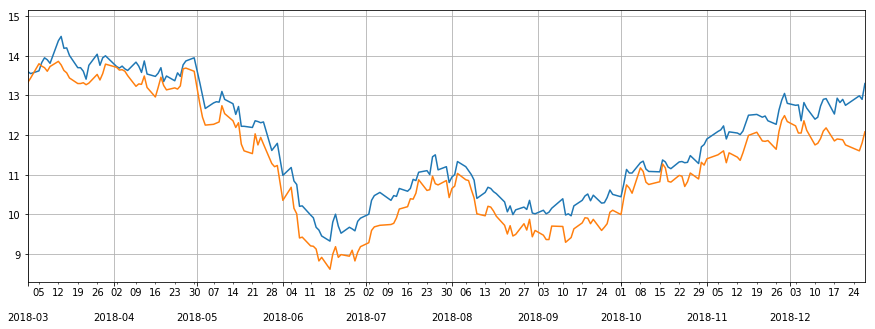

In [164]:
stock1 = pd.read_csv('HISTORICO_2018/ITSA3_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
stock2 = pd.read_csv('HISTORICO_2018/ITSA4_2018', index_col = 'DATA DO PREGAO', parse_dates=True)

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

fig, ax = plt.subplots()


ax.plot(stock1['PRECO FECHAMENTO'])
ax.plot(stock2['PRECO FECHAMENTO'])


title_stg = stock1['NOME RESUMIDO DA EMPRESA EMISSORA'].iloc[0] + ": " + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]

ax.set_xlim(['2018-03-01', '2018-12-28'])
ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Razão do par - Gráfico a ser operado

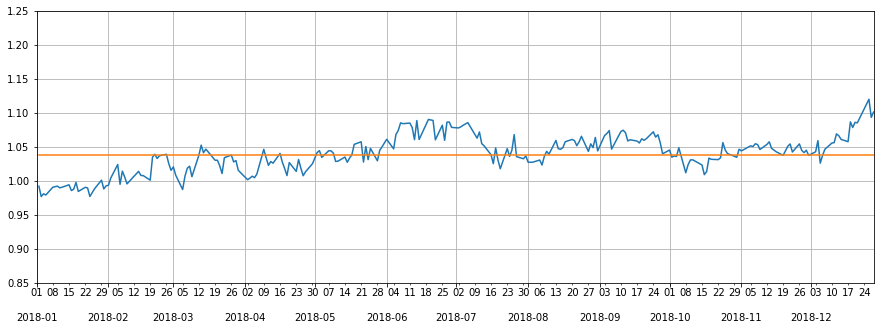

In [165]:
fig, ax = plt.subplots()

stock1['aux'] = stock1['PRECO FECHAMENTO'].mean()/stock2['PRECO FECHAMENTO'].mean()
ax.plot(stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO'])
ax.plot(stock1['aux'])


ax.set_xlim(['2018-01-01', '2018-12-28'])
ax.set_ylim([.85, 1.25])

ax.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# GERANDO TABELA DE CADA PAR

In [166]:
for each in range(len(df_pares)):
    stock1 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[each]['Empresa1'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    stock2 = pd.read_csv('HISTORICO_2018/' + df_pares.iloc[each]['Empresa2'] + '_2018', index_col = 'DATA DO PREGAO', parse_dates=True)
    df = pd.DataFrame()
    df['Empresa1'] = stock1['PRECO FECHAMENTO']
    df['Empresa2'] = stock2['PRECO FECHAMENTO']
    df['Par'] = stock1.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL'] + '_' + stock2.iloc[0]['CODIGO DE NEGOCIACAO DO PAPEL']
    df['Ratio'] = stock1['PRECO FECHAMENTO']/stock2['PRECO FECHAMENTO']
    df['MA_40'] = df['Ratio'].rolling(window=40).mean()
    df['STD_40'] = df['Ratio'].rolling(window=40).std()
    df['BANDA_1_40 SUPERIOR'] = df['MA_40'] + 2* df['STD_40']
    df['BANDA_1_40 INFERIOR'] = df['MA_40'] - 2* df['STD_40']
    df['BANDA_2_40 SUPERIOR'] = df['MA_40'] + 3* df['STD_40']
    df['BANDA_2_40 INFERIOR'] = df['MA_40'] - 3* df['STD_40']
    df['BANDA_3_40 SUPERIOR'] = df['MA_40'] + 4* df['STD_40']
    df['BANDA_3_40 INFERIOR'] = df['MA_40'] - 4* df['STD_40']
    df['PRECO FECHAMENTO'] = df['Ratio']
    save_dir = 'PARESLS/' + stock1['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0] + "_" + stock2['CODIGO DE NEGOCIACAO DO PAPEL'].iloc[0]
    df = df.reset_index()
    df.to_csv(save_dir,index=False)

In [167]:
df.tail()

,DATA DO PREGAO,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
240,2018-12-20,21.49,24.16,PETR4_PETR3,0.889487,0.902881,0.014374,0.931628,0.874134,0.946002,0.859761,0.960375,0.845387,0.889487
241,2018-12-21,21.55,24.18,PETR4_PETR3,0.891232,0.902700,0.014476,0.931652,0.873748,0.946127,0.859272,0.960603,0.844796,0.891232
242,2018-12-26,21.68,24.58,PETR4_PETR3,0.882018,0.902081,0.014822,0.931725,0.872436,0.946547,0.857614,0.961370,0.842792,0.882018
243,2018-12-27,21.67,24.44,PETR4_PETR3,0.886661,0.901487,0.014955,0.931397,0.871577,0.946352,0.856622,0.961307,0.841667,0.886661
244,2018-12-28,22.68,25.40,PETR4_PETR3,0.892913,0.900810,0.014706,0.930223,0.871397,0.944929,0.856691,0.959636,0.841984,0.892913


In [168]:
df = pd.read_csv(save_dir, index_col = 'DATA DO PREGAO', parse_dates=True)
df.head()

,Empresa1,Empresa2,Par,Ratio,MA_40,STD_40,BANDA_1_40 SUPERIOR,BANDA_1_40 INFERIOR,BANDA_2_40 SUPERIOR,BANDA_2_40 INFERIOR,BANDA_3_40 SUPERIOR,BANDA_3_40 INFERIOR,PRECO FECHAMENTO
DATA DO PREGAO,,,,,,,,,,,,,
2018-01-02,16.55,17.33,PETR4_PETR3,0.954991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.954991
2018-01-03,16.70,17.55,PETR4_PETR3,0.951567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951567
2018-01-04,16.73,17.70,PETR4_PETR3,0.945198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945198
2018-01-05,16.83,17.84,PETR4_PETR3,0.943386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.943386
2018-01-08,17.03,18.12,PETR4_PETR3,0.939845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.939845


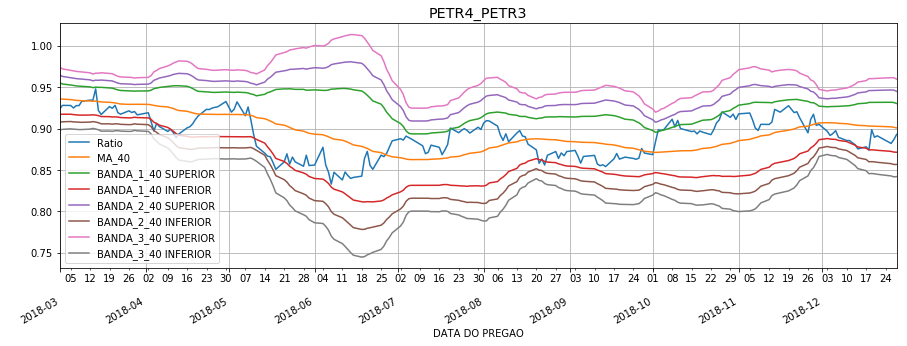

In [169]:
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

stock_plt = df[['Ratio','MA_40','BANDA_1_40 SUPERIOR','BANDA_1_40 INFERIOR','BANDA_2_40 SUPERIOR','BANDA_2_40 INFERIOR','BANDA_3_40 SUPERIOR','BANDA_3_40 INFERIOR']].plot
title_stg = df.iloc[0]['Par']

stock_plt = stock_plt.line(title = title_stg)

stock_plt.set_xlim(['2018-03-01', '2018-12-28'])
stock_plt.grid()
stock_plt.xaxis.set_major_locator(dates.MonthLocator())
stock_plt.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%m'))
stock_plt.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=0))
stock_plt.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# TABELAS AUXILIARES DAS ESTRATEGIAS

In [148]:
df_pares = pd.read_csv('PARESLS/PARES')

df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']

df['ESTADO'] = 'PROCURANDO ENTRADA'
df['AUX'] = '0'
df['FROZEN'] = '0'


save_dir = 'STRATEGIES/LongShort'
df.to_csv(save_dir,index=False)
df

,CODIGO DE NEGOCIACAO DO PAPEL,ESTADO,AUX,FROZEN
0,ITSA3_ITSA4,PROCURANDO ENTRADA,0,0
1,ELET6_ELET3,PROCURANDO ENTRADA,0,0
2,ITUB4_ITSA4,PROCURANDO ENTRADA,0,0
3,ITUB4_ITUB3,PROCURANDO ENTRADA,0,0
4,MYPK3_ARZZ3,PROCURANDO ENTRADA,0,0
5,ARZZ3_GUAR3,PROCURANDO ENTRADA,0,0
6,ITSA3_ITUB4,PROCURANDO ENTRADA,0,0
7,CVCB3_GUAR3,PROCURANDO ENTRADA,0,0
8,ITSA4_ITUB3,PROCURANDO ENTRADA,0,0
9,ITUB3_ITSA3,PROCURANDO ENTRADA,0,0


# TABELAS DE REGISTRO OPERAÇÕES

In [170]:
df = pd.DataFrame()
df['CODIGO DE NEGOCIACAO DO PAPEL'] = ['']
df['DATA DO PREGAO'] = ['']
df['PRECO'] = ['']
df['OPERACAO'] = ['']

save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
df.head()

,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,,,,


# RESULTADO

In [177]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

109


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,MYPK3_ARZZ3,2018-03-01,0.405615,BUY
1,ELET6_ELET3,2018-03-08,1.136293,BUY
2,MYPK3_ARZZ3,2018-03-12,0.445740,SELL
3,ITSA3_ITSA4,2018-03-13,1.045355,SELL
4,CVCB3_GUAR3,2018-03-20,0.380124,SELL


# Plot exemplo da estratégia

In [179]:
# Pegando as ordens
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
orders_df = orders_df[df['CODIGO DE NEGOCIACAO DO PAPEL'] == 'ELET6_ELET3'].reset_index()
orders_df.head()

,index,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,1,ELET6_ELET3,2018-03-08,1.136293,BUY
1,5,ELET6_ELET3,2018-03-21,1.155458,SELL
2,13,ELET6_ELET3,2018-04-09,1.191733,SELL
3,23,ELET6_ELET3,2018-05-03,1.166973,BUY
4,27,ELET6_ELET3,2018-05-17,1.115211,BUY


In [180]:
# Pegando os dados
stock = pd.read_csv('PARESLS/ELET6_ELET3', index_col = 'DATA DO PREGAO', parse_dates=True)
stock['date_ax'] = stock.index
stock['date_ax'] = stock['date_ax'].apply(lambda date: date2num(date))


# Intervalo desejado
stock = stock.loc['2018-03-01' : '2018-12-28'].reset_index()

candle_values = [tuple(vals) for vals in stock[['date_ax', 'Ratio', 'Ratio', 'Ratio', 'Ratio']].values]


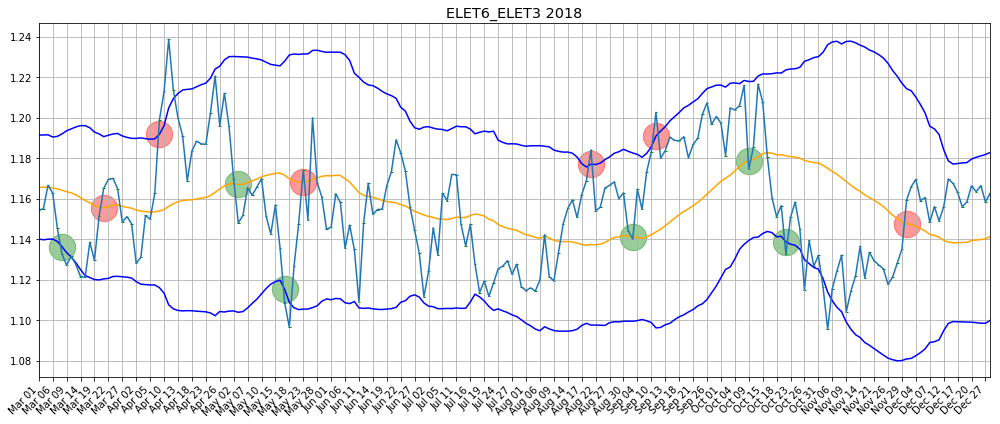

In [181]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(ncols=1, figsize=(14, 6))

# Parâmetros pro candle plot
fmt='%b %d'
freq=3
width=0.55
ohlc_data = candle_values

# Remover Final de Semana
# Convert data to numpy array 
ohlc_data_arr = np.array(ohlc_data)
ohlc_data_arr2 = np.hstack(
    [np.arange(ohlc_data_arr[:,0].size)[:,np.newaxis], ohlc_data_arr[:,1:]])
ndays = ohlc_data_arr2[:,0]  # array([0, 1, 2, ... n-2, n-1, n])

# Convert matplotlib date numbers to strings based on `fmt`
dates = mdates.num2date(ohlc_data_arr[:,0])
date_strings = []
for date in dates:
    date_strings.append(date.strftime(fmt))

# Plot candlestick chart
candle.candlestick_ohlc(ax, ohlc_data_arr2, width, colorup = 'g', colordown = 'r')
plt.grid()

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

# Plot indicadores
ax.plot(ohlc_data_arr2[:,0],stock['MA_40'], color = "orange")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 SUPERIOR'], color = "blue")
ax.plot(ohlc_data_arr2[:,0],stock['BANDA_1_40 INFERIOR'], color = "blue")

# Formating
ax.set_xticks(ndays[::freq])
ax.set_xticklabels(date_strings[::freq], rotation=45, ha='right', fontsize='medium')
ax.set_xlim(ndays.min(), ndays.max())
ax.set_title(stock['Par'].iloc[0] + " 2018")
plt.tight_layout()
plt.grid()

# Adjusting order index
new_order_id = []
order_id = 0
for each in range(len(stock)):
    if orders_df['DATA DO PREGAO'].iloc[order_id] == stock['DATA DO PREGAO'].iloc[each]:
        new_order_id.append(each)
        order_id = order_id + 1
    if order_id >= len(orders_df):
        break
    

# Plot ordens

for each_order in range(len(new_order_id)):
    if orders_df['OPERACAO'].iloc[each_order] == 'SELL':
        cor = 'red'
    else:
        cor = 'green'
    ax.scatter(new_order_id[each_order],orders_df['PRECO'].iloc[each_order], s=700, c=cor, alpha=.4)
plt.grid()

ax.plot(stock['Ratio'])

  

# Análise Qualitativa

In [182]:
# Pega ordens:
df = pd.read_csv('BACK_TEST/LongShort')
df = df.dropna()
save_dir = 'BACK_TEST/LongShort'
df.to_csv(save_dir,index=False)
orders_df = pd.read_csv('BACK_TEST/LongShort', parse_dates=['DATA DO PREGAO'])
print(len(orders_df))
orders_df.head()

109


,CODIGO DE NEGOCIACAO DO PAPEL,DATA DO PREGAO,PRECO,OPERACAO
0,MYPK3_ARZZ3,2018-03-01,0.405615,BUY
1,ELET6_ELET3,2018-03-08,1.136293,BUY
2,MYPK3_ARZZ3,2018-03-12,0.445740,SELL
3,ITSA3_ITSA4,2018-03-13,1.045355,SELL
4,CVCB3_GUAR3,2018-03-20,0.380124,SELL


In [183]:
# Pega id das ordens não fechadas
id_to_remove = []
pares = pd.read_csv('PARESLS/PARES')
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    if len(df)%2:
        id_to_remove.append(df.iloc[len(df)-1]['index'])
id_to_remove

[104, 98, 96, 106, 99, 100, 101, 107, 105]

In [184]:
# Remove as ordens nao fechadas pelo id
lucro = 0
id_to_remove.sort(reverse=True)
for each_id in id_to_remove:
    orders_df = orders_df.drop(orders_df.index[each_id])
id_to_remove = []
print(len(orders_df))

100


In [190]:
# Armazena os lucros individuais de cada ordem

ordem_fechada = []
operacoes_prejuizo = 0
for par in pares['Par']:
    df = orders_df[orders_df['CODIGO DE NEGOCIACAO DO PAPEL'] == par].reset_index()
    for i in range(int(len(df)/2)):
        i = i*2
        if df.iloc[i]['OPERACAO'] == 'BUY':
            # Se eu comprei antes, lucro = venda futura - compra presente
            lucro = (df.iloc[i+1]['PRECO'] - df.iloc[i]['PRECO'])/df.iloc[i]['PRECO']
        else:
            # Se eu vendi antes, lucro = venda atual - compra futura
            lucro = (df.iloc[i]['PRECO'] - df.iloc[i+1]['PRECO'])/df.iloc[i]['PRECO']
        ordem_fechada.append(lucro*100)
        
        if lucro*100 < -5:
            print("Operacoes com prejuízo: " + str(round(lucro*100,2)) + "% em: " + df.iloc[i]['CODIGO DE NEGOCIACAO DO PAPEL'])
            operacoes_prejuizo = operacoes_prejuizo + 1
operacoes_prejuizo

Operacoes com prejuízo: -7.06% em: ITUB4_ITSA4
Operacoes com prejuízo: -6.99% em: MYPK3_ARZZ3
Operacoes com prejuízo: -10.68% em: ARZZ3_GUAR3
Operacoes com prejuízo: -9.51% em: ARZZ3_GUAR3
Operacoes com prejuízo: -14.98% em: CVCB3_GUAR3
Operacoes com prejuízo: -6.87% em: ITSA4_ITUB3
Operacoes com prejuízo: -6.08% em: ITUB3_ITSA3


7

In [191]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

Quantidade de ordens: 100
Quantidade de operações FECHADAS: 50
Média de lucro das ordens: 0.6464284601325437
Somatório de lucro individual: 32.321423006627185
Operações com lucro: 43
Operações com prejuízo: 7
Porcentagem de acerto da estratégia: 86.0%


<BarContainer object of 50 artists>

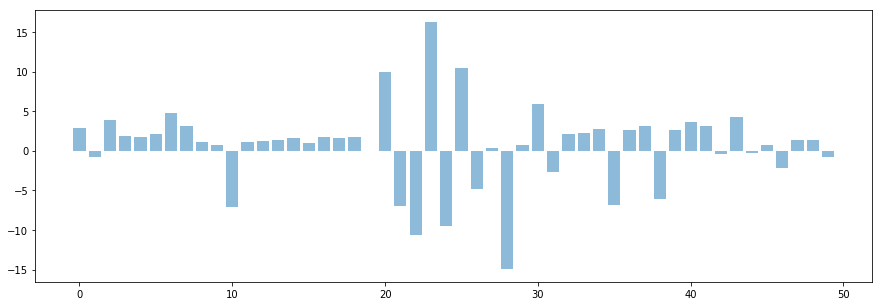

In [192]:
porcentagem_acerto = 100*(len(ordem_fechada) - operacoes_prejuizo)/len(ordem_fechada)
porcentagem_acerto = round(porcentagem_acerto,2)      
porcentagem_acerto = str(porcentagem_acerto) + '%'

print("Quantidade de ordens: " + str(len(ordem_fechada*2)))
print("Quantidade de operações FECHADAS: " + str(len(ordem_fechada)))
print("Média de lucro das ordens: " + str(sum(ordem_fechada)/len(ordem_fechada)))
print("Somatório de lucro individual: " + str(sum(ordem_fechada)))
print("Operações com lucro: " + str(len(ordem_fechada) - operacoes_prejuizo))
print("Operações com prejuízo: " + str(operacoes_prejuizo))
print("Porcentagem de acerto da estratégia: " + porcentagem_acerto)

x_values = np.arange(len(ordem_fechada))

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

plt.bar(x_values, ordem_fechada, align='center', alpha=0.5)

(array([ 1.,  0.,  1.,  1.,  0.,  4.,  1.,  1.,  1.,  6., 18.,  9.,  3.,
         1.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([-14.98413521, -13.42467907, -11.86522293, -10.30576679,
         -8.74631065,  -7.18685451,  -5.62739838,  -4.06794224,
         -2.5084861 ,  -0.94902996,   0.61042618,   2.16988232,
          3.72933846,   5.2887946 ,   6.84825074,   8.40770688,
          9.96716301,  11.52661915,  13.08607529,  14.64553143,
         16.20498757]),
 <a list of 20 Patch objects>)

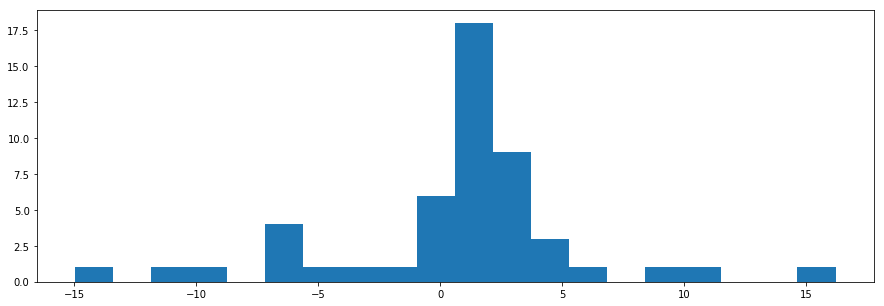

In [193]:
plt.hist(ordem_fechada,bins=20)

In [194]:
# Dataframe para auxilar no calculo da carteira ls

df_pares = pd.read_csv('PARESLS/PARES')

df_c_ls = pd.DataFrame()
df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
df_c_ls['ESTADO'] = 'FECHADA'
df_c_ls['CAPITAL ALOCADO'] = '0'
df_c_ls['QUANTIDADE PAPEL'] = '0'
df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
df_c_ls
# df_c_ls.loc['PETR3_PETR4']['ESTADO'] returns 'FECHADA'

,ESTADO,CAPITAL ALOCADO,QUANTIDADE PAPEL
CODIGO DE NEGOCIACAO DO PAPEL,,,
ITSA3_ITSA4,FECHADA,0,0
ELET6_ELET3,FECHADA,0,0
ITUB4_ITSA4,FECHADA,0,0
ITUB4_ITUB3,FECHADA,0,0
MYPK3_ARZZ3,FECHADA,0,0
ARZZ3_GUAR3,FECHADA,0,0
ITSA3_ITUB4,FECHADA,0,0
CVCB3_GUAR3,FECHADA,0,0
ITSA4_ITUB3,FECHADA,0,0


# Evolução da carteira - SALDO

In [74]:
# CONSIDERANDO QUE A VENDA DESCOBERTA(PONTA SHORT) VAI PUXAR 125% DE MARGEM E O PAPEL COMPRADO COM DESÁGIL DE 25%
# SE EU VENDO 100k DE 'A' E COMPRO 100K DE 'B', PRECISO DE 50K EM DINHEIRO COMO GARANTIA, PORQUE, NO TOTAL, A 
# GARANTIA SERÁ DE 50K EM DINHEIRO MAIS 75% de 100k DE 'B' = 50k + 0.75*100K = 125k QUE É O NECESSARIO PARA O
# ALUGUEL DE 'A'

In [195]:
# Carteira inicial R$ 1.000.000

melhor_carteira = 1000000
carteiras = {
             0: 0,
             0: 0,
}
for alocacao in range(300):
    alocacao = alocacao/100
    df_c_ls = pd.DataFrame()
    df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
    df_c_ls['ESTADO'] = 'FECHADA'
    df_c_ls['CAPITAL ALOCADO'] = '0'
    df_c_ls['QUANTIDADE PAPEL'] = '0'
    df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
    carteira = 1000000
    carteira_hist = [1000000]
    
    for i in range(len(orders_df)):

        order = orders_df.iloc[i]

        if df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] == 'FECHADA': # CALCULA ENTRADA
            disponivel = carteira * alocacao
            quantidade_papel = round(disponivel/order['PRECO'])
            investimento = quantidade_papel * order['PRECO']
            garantia = investimento/2
            if order['OPERACAO'] == 'BUY':
                carteira = carteira - garantia
            elif order['OPERACAO'] == 'SELL':
                carteira = carteira - garantia
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'ABERTA'
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO'] = investimento
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL'] = quantidade_papel

        else:  # FECHA OPERACAO
            alocado = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO']
            garantia = alocado/2
            quantidade_papel = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL']
            retorno = quantidade_papel * order['PRECO']
            lucro = retorno - alocado
            if order['OPERACAO'] == 'BUY':
                carteira = carteira + garantia - lucro
            elif order['OPERACAO'] == 'SELL':
                carteira = carteira + garantia + lucro
            df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'FECHADA'
        
        carteira_hist.append(carteira) 
        
        if carteira < 0: 
            break
    if carteira > 0: 
            carteiras.update({alocacao: carteira})
    if carteira > melhor_carteira:
        melhor_carteira = carteira
        best_alocacao = alocacao

print('best aloc: ' + str(best_alocacao))
print('Capital usado como garantia em cada operação:' + str(best_alocacao*100/2) + '%')
print('best carteira: ' + str(melhor_carteira))
# plt.plot(carteira_hist)
# df_c_ls

best aloc: 1.93
Capital usado como garantia em cada operação:96.5%
best carteira: 2608039.0589879835


,ESTADO,CAPITAL ALOCADO,QUANTIDADE PAPEL
CODIGO DE NEGOCIACAO DO PAPEL,,,
ITSA3_ITSA4,FECHADA,0,0
ELET6_ELET3,FECHADA,4.82275e+06,4.23553e+06
ITUB4_ITSA4,FECHADA,0,0
ITUB4_ITUB3,FECHADA,140249,121413
MYPK3_ARZZ3,FECHADA,3.30876e+06,6.03539e+06
ARZZ3_GUAR3,FECHADA,4.00711e+06,1.00201e+07
ITSA3_ITUB4,FECHADA,176.527,748
CVCB3_GUAR3,FECHADA,323381,824719
ITSA4_ITUB3,FECHADA,5039.66,18810


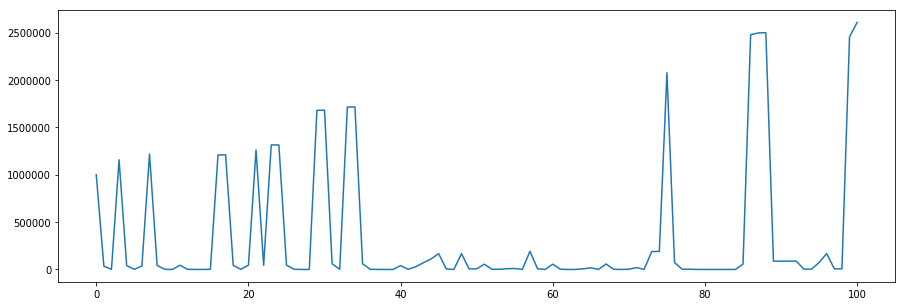

In [196]:
df_c_ls = pd.DataFrame()
df_c_ls['CODIGO DE NEGOCIACAO DO PAPEL'] = df_pares['Empresa1'] + '_' + df_pares['Empresa2']
df_c_ls['ESTADO'] = 'FECHADA'
df_c_ls['CAPITAL ALOCADO'] = '0'
df_c_ls['QUANTIDADE PAPEL'] = '0'
df_c_ls = df_c_ls.set_index('CODIGO DE NEGOCIACAO DO PAPEL')
carteira = 1000000
carteira_hist = [1000000]
alocacao = best_alocacao

for i in range(len(orders_df)):

    order = orders_df.iloc[i]

    if df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] == 'FECHADA': # CALCULA ENTRADA
        disponivel = carteira * alocacao
        quantidade_papel = round(disponivel/order['PRECO'])
        investimento = quantidade_papel * order['PRECO']
        garantia = investimento/2
        if order['OPERACAO'] == 'BUY':
            carteira = carteira - garantia
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira - garantia
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'ABERTA'
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO'] = investimento
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL'] = quantidade_papel

    else:  # FECHA OPERACAO
        alocado = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['CAPITAL ALOCADO']
        garantia = alocado/2
        quantidade_papel = df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['QUANTIDADE PAPEL']
        retorno = quantidade_papel * order['PRECO']
        lucro = retorno - alocado
        if order['OPERACAO'] == 'BUY':
            carteira = carteira + garantia - lucro
        elif order['OPERACAO'] == 'SELL':
            carteira = carteira + garantia + lucro
        df_c_ls.loc[order['CODIGO DE NEGOCIACAO DO PAPEL']]['ESTADO'] = 'FECHADA'

    carteira_hist.append(carteira) 

plt.plot(carteira_hist)
df_c_ls

In [131]:
print('Melhor alocação em cada operação: ' + str(best_alocacao*100) + '%')
print('Capital usado como garantia em cada operação:' + str(best_alocacao*100/2) + '%')
print('Saldo final da carteira com todas operações fechadas: ' + str(melhor_carteira))
lucro = str( round(100*(melhor_carteira-carteira_hist[0])/carteira_hist[0],2) ) 
print('Lucro obtido em 9 meses: ' + lucro + '%') 

Melhor alocação em cada operação: 164.0%
Capital usado como garantia em cada operação:82.0%
Saldo final da carteira com todas operações fechadas: 1578169.3067866599
Lucro obtido em 9 meses: 57.82%


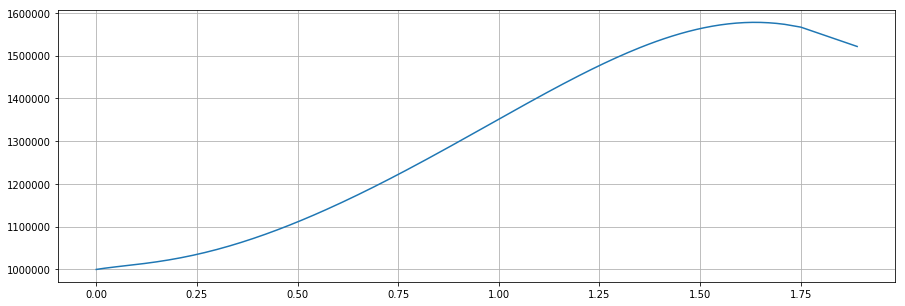

In [132]:
lists = sorted(carteiras.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)

plt.grid()


In [133]:
carteiras

{0: 1000000.0,
 0.01: 1001442.7259874623,
 0.02: 1002760.8587332161,
 0.03: 1003985.4254649361,
 0.04: 1005138.0161642397,
 0.05: 1006242.9579217619,
 0.06: 1007318.8247772225,
 0.07: 1008382.506367384,
 0.08: 1009446.9481043139,
 0.09: 1010526.203570038,
 0.1: 1011630.179442846,
 0.11: 1012768.9648576301,
 0.12: 1013949.199449286,
 0.13: 1015179.7781920925,
 0.14: 1016464.7621066739,
 0.15: 1017810.1972801473,
 0.16: 1019219.8258668475,
 0.17: 1020696.7774899092,
 0.18: 1022244.5427342905,
 0.19: 1023864.8509671818,
 0.2: 1025561.0247318422,
 0.21: 1027332.8955861526,
 0.22: 1029182.0315856398,
 0.23: 1031109.8280038908,
 0.24: 1033117.393465238,
 0.25: 1035202.2369962538,
 0.26: 1037367.8951679575,
 0.27: 1039611.9721980984,
 0.28: 1041934.1006035246,
 0.29: 1044336.3594384216,
 0.3: 1046814.8488030385,
 0.31: 1049370.2274603373,
 0.32: 1052001.3888679838,
 0.33: 1054709.708698169,
 0.34: 1057491.4665456435,
 0.35: 1060346.845734628,
 0.36: 1063275.2090228146,
 0.37: 1066274.82478052